In [522]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

In [523]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [524]:
data=pd.read_csv('DailyDelhiClimateTest.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
data = data.asfreq('D')
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


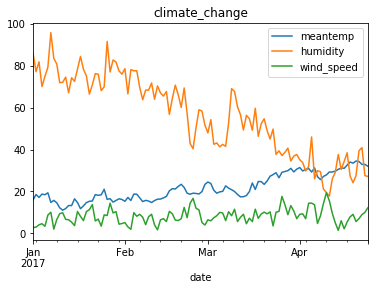

In [525]:
data[["meantemp","humidity","wind_speed"]].plot()
plt.title('climate_change')
plt.show()

In [526]:
y=[]
def Pct_change(data):
    for i in (data):
        x=(data[i].pct_change(periods=1))*100
        y.append(x)

In [527]:
Pct_change(data[['meantemp','humidity','wind_speed']])

In [528]:
y=pd.DataFrame(y)
y=y.fillna(0)
y=y.transpose()
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Freq: D
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    114 non-null    float64
 1   humidity    114 non-null    float64
 2   wind_speed  114 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB


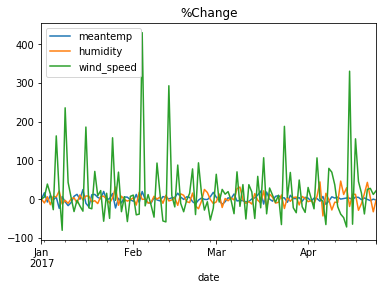

In [529]:
y.plot()
plt.title('%Change')
plt.show()

In [530]:
sums=y['meantemp'].values
total = 100
c=[]
for i in range(len(sums)):
    total = total + sums[i]
    c.append(total)
sums=y['humidity'].values
total = 100
h=[]
for i in range(len(sums)):
    total = total + sums[i]
    h.append(total)
sums=y['wind_speed'].values
total = 100
w=[]
for i in range(len(sums)):
    total = total + sums[i]
    w.append(total)

In [531]:
data["%meantemp"]=c
data["%humidity"]=h
data["%wind_speed"]=w
data

,meantemp,humidity,wind_speed,meanpressure,%meantemp,%humidity,%wind_speed
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,100.000000,100.000000,100.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778,116.256831,89.929677,105.502729
2017-01-03,17.111111,81.888889,4.016667,1018.333333,108.749323,95.972842,144.274322
2017-01-04,18.700000,70.050000,4.545000,1015.700000,118.035037,81.515583,157.427849
2017-01-05,18.388889,74.944444,3.300000,1014.333333,116.371342,88.502656,130.035110
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,220.858556,101.308471,2266.902021
2017-04-21,34.250000,39.375000,6.962500,999.875000,220.133918,144.490289,2292.070560
2017-04-22,32.900000,40.900000,8.890000,1001.600000,216.192313,148.363305,2319.754581


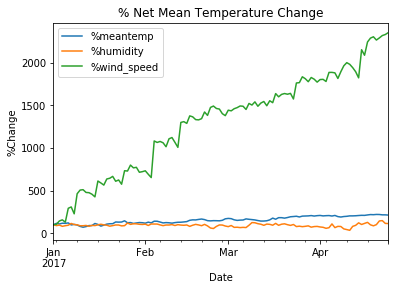

In [532]:
data[['%meantemp','%humidity','%wind_speed']].plot()
plt.title('% Net Mean Temperature Change')
plt.xlabel('Date')
plt.ylabel('%Change')
plt.show()

In [533]:
data[['%meantemp','%humidity','%wind_speed']].std()

%meantemp       40.081746
%humidity       18.282481
%wind_speed    598.654930
dtype: float64

In [534]:
STL=STL(data['meantemp'])
Result=STL.fit()

In [535]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid

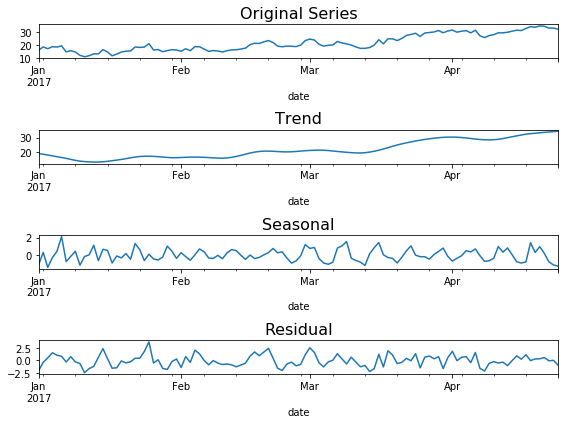

In [536]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
data['meantemp'].plot()
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
trend.plot()
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
seasonal.plot()
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
resid.plot()
plt.title('Residual', fontsize=16)

plt.tight_layout()

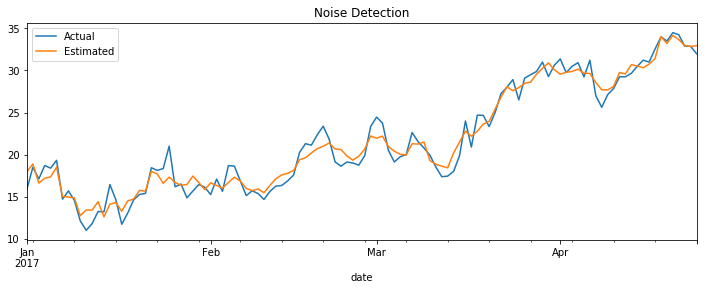

In [537]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
data['meantemp'].plot(label='Actual')
estimated.plot(label='Estimated')
plt.title('Noise Detection')
plt.legend()
plt.show()

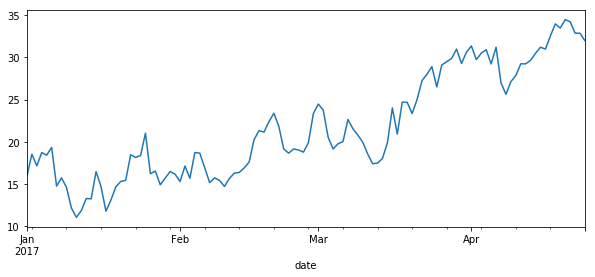

In [538]:
plt.figure(figsize=(10,4))
data['meantemp'].plot()

In [539]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 1.5*resid_dev
upper = resid_mu + 1.5*resid_dev

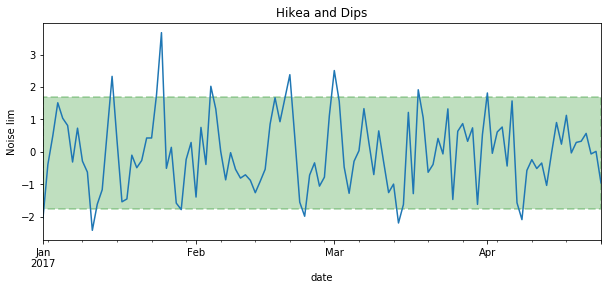

In [540]:
plt.figure(figsize=(10,4))
resid.plot()
plt.fill_between([datetime(2017,1,1), datetime(2017,4,24)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2017,1,1), datetime(2017,4,24))
plt.title('Hikea and Dips')
plt.ylabel('Noise lim')
plt.show()

In [541]:
anomalies = data.meantemp[(resid < lower) | (resid > upper)]

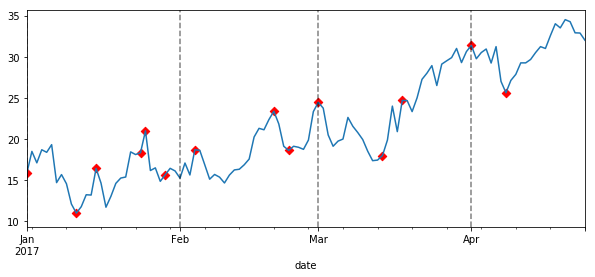

In [542]:
plt.figure(figsize=(10,4))
data['meantemp'].plot()
for month in range(1,5):
    plt.axvline(datetime(2017,month,1), color='k', linestyle='--', alpha=0.5)
plt.scatter(anomalies.index,anomalies, color='r', marker='D')
plt.show()

In [543]:
def mean(month):
    for values in range (len(month)):
        x=data.meantemp[data.meantemp.index.month == month[values]]
        y=x.drop(anomalies[anomalies.index.month == month[values]].index)
        mean=y.mean()
        data.meantemp.loc[anomalies[anomalies.index.month==month[values]].index]=mean
x=anomalies.index.month.values
mean(x)

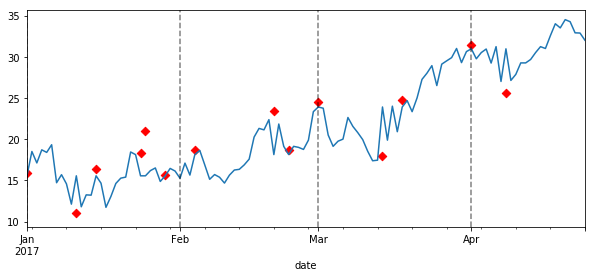

In [544]:
plt.figure(figsize=(10,4))
data['meantemp'].plot()
for month in range(1,5):
    plt.axvline(datetime(2017,month,1), color='k', linestyle='--', alpha=0.5)
plt.scatter(anomalies.index,anomalies, color='r', marker='D')
plt.show()

In [545]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [546]:
adfuller_test(data['meantemp'])

ADF Test Statistics : -0.4143412589586565
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
p-value : 0.9076766232681666
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
#Lags Used : 1
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Number of Observations Used : 112
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [547]:
first_diff =data['meantemp'].diff()[1:]

In [548]:
adfuller_test(first_diff)

ADF Test Statistics : -16.76598754306706
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 1.2985443510616472e-29
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 0
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 112
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


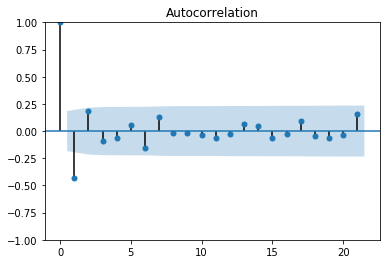

In [549]:
acf_plot = plot_acf(first_diff)

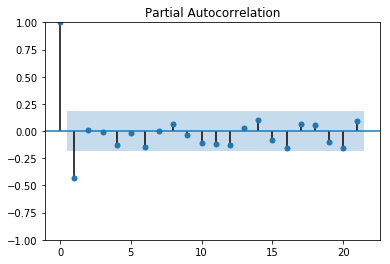

In [550]:
pacf_plot = plot_pacf(first_diff,method='ywm')

In [551]:
from statsmodels.tsa.arima.model import ARIMA
my_order=(0,1,1)# My time series is seasonal thats why i am setting my normal AR,MA=0, and 1 differencing helped me get my time series stationary
my_seasonal_order=(1,1,0,30) # my time series is yearly and Pacf, Acf both has a significant lag at point 3 and seasonal lag of MA in (1,0,1,3 )is insignificant, so(1,0,0,3)
model = SARIMAX(data.meantemp, order=my_order,seasonal_order=my_seasonal_order)

In [552]:
model_fit = model.fit()

In [553]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 30)   Log Likelihood                -179.076
Date:                             Thu, 13 Jan 2022   AIC                            364.152
Time:                                     16:43:10   BIC                            371.409
Sample:                                 01-01-2017   HQIC                           367.067
                                      - 04-24-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5488      0.105     -5.228      0.000      -0.755      -0.343
ar.S.L30      -0.5556      

In [554]:
predictions = model_fit.forecast(20)
predictions

2017-04-25    33.509947
2017-04-26    33.618281
2017-04-27    33.652232
2017-04-28    34.771059
2017-04-29    35.930447
2017-04-30    36.840753
2017-05-01    36.905408
2017-05-02    34.562725
2017-05-03    34.132171
2017-05-04    34.671985
2017-05-05    34.054178
2017-05-06    36.397601
2017-05-07    33.921308
2017-05-08    35.258585
2017-05-09    33.083557
2017-05-10    32.628862
2017-05-11    32.604393
2017-05-12    32.642973
2017-05-13    36.414826
2017-05-14    34.548837
Freq: D, Name: predicted_mean, dtype: float64

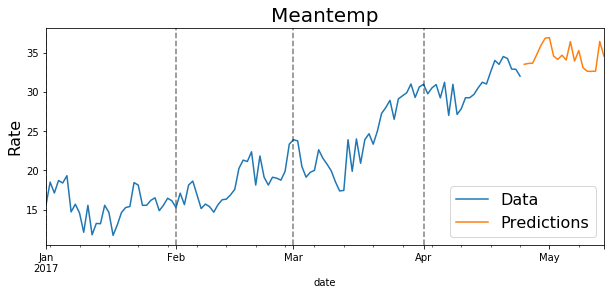

In [555]:
plt.figure(figsize=(10,4))

data['meantemp'].plot()
predictions.plot()

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Meantemp', fontsize=20)
plt.ylabel('Rate', fontsize=16)

for month in range(1,5):
    plt.axvline(datetime(2017,month,1), color='k', linestyle='--', alpha=0.5)
plt.show()

In [556]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.meantemp.index[-1]+ DateOffset(days=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_df=pd.concat([data,future_datest_df])
future_df = future_df.asfreq('D')
future_df

,meantemp,humidity,wind_speed,meanpressure,%meantemp,%humidity,%wind_speed
2017-01-01,15.546989,85.869565,2.743478,59.000000,100.000000,100.000000,100.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778,116.256831,89.929677,105.502729
2017-01-03,17.111111,81.888889,4.016667,1018.333333,108.749323,95.972842,144.274322
2017-01-04,18.700000,70.050000,4.545000,1015.700000,118.035037,81.515583,157.427849
2017-01-05,18.388889,74.944444,3.300000,1014.333333,116.371342,88.502656,130.035110
...,...,...,...,...,...,...,...
2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [557]:
train_end = datetime(2017,4,24)
test_end = datetime(2017,5,13)

train_data = future_df[:train_end]
test_data = future_df[train_end+timedelta(days=1) :test_end]
test_data

,meantemp,humidity,wind_speed,meanpressure,%meantemp,%humidity,%wind_speed
2017-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
train_data=data.meantemp[:-12]
test_data=data.meantemp[-12:]

In [559]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = data.meantemp[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order,seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
print(rolling_predictions)

date
2017-04-13    32.497864
2017-04-14    29.136477
2017-04-15    31.999653
2017-04-16    30.578787
2017-04-17    33.603807
2017-04-18    34.046909
2017-04-19    33.331110
2017-04-20    34.841223
2017-04-21    33.318530
2017-04-22    36.147978
2017-04-23    33.632817
2017-04-24    31.627820
Freq: D, Name: meantemp, dtype: float64


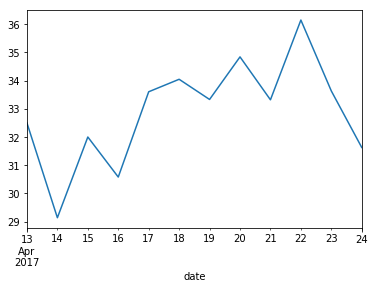

In [560]:
rolling_predictions.plot()

In [616]:
from scipy.signal import savgol_filter
yhat = savgol_filter(rolling_predictions, 3, 1)
yhat

array([31.46043689, 31.21133143, 30.57163918, 32.0607491 , 32.7431679 ,
       33.66060893, 34.07308104, 33.83028774, 34.76924359, 34.36644141,
       33.80287156, 31.54279265])

In [617]:
rng = pd.date_range(start="2017-04-13",end="2017-04-24",freq='D')
rolling_predictions1 = pd.Series(yhat, index=rng)
rolling_predictions1

2017-04-13    31.460437
2017-04-14    31.211331
2017-04-15    30.571639
2017-04-16    32.060749
2017-04-17    32.743168
2017-04-18    33.660609
2017-04-19    34.073081
2017-04-20    33.830288
2017-04-21    34.769244
2017-04-22    34.366441
2017-04-23    33.802872
2017-04-24    31.542793
Freq: D, dtype: float64

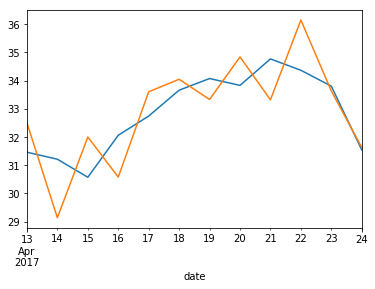

In [618]:
rolling_predictions1.plot()
rolling_predictions.plot()

In [619]:
rmse(test_data,rolling_predictions1)

0.8985831694009592

In [610]:
train.mean()

meantemp    20.278216
dtype: float64

In [620]:
rmse(test_data,rolling_predictions1)/train.mean()

meantemp    0.044313
dtype: float64

Text(0, 0.5, 'Rate')

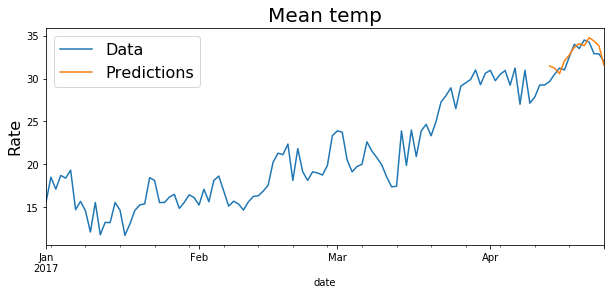

In [612]:
plt.figure(figsize=(10,4))

data.meantemp.plot()
rolling_predictions1.plot()

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Mean temp', fontsize=20)
plt.ylabel('Rate', fontsize=16)

In [613]:
rolling_residuals = test_data - rolling_predictions1
rolling_residuals

date
2017-04-13   -1.793770
2017-04-14   -0.711331
2017-04-15    0.650583
2017-04-16   -1.060749
2017-04-17   -0.187612
2017-04-18    0.339391
2017-04-19   -0.573081
2017-04-20    0.669712
2017-04-21   -0.519244
2017-04-22   -1.466441
2017-04-23   -0.927872
2017-04-24    0.457207
Freq: D, dtype: float64

Text(0, 0.5, 'Error')

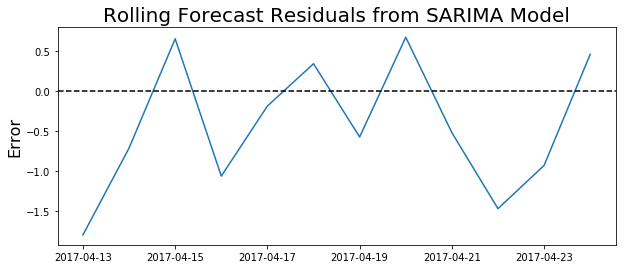

In [614]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [106]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0323


In [107]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1.4151702339005257


In [108]:
train_data.mean()

21.604842030577746

In [109]:
train_data=future_df.meantemp[:-19]
test_data=future_df.meantemp[-19:]
test_data

2017-04-25   NaN
2017-04-26   NaN
2017-04-27   NaN
2017-04-28   NaN
2017-04-29   NaN
2017-04-30   NaN
2017-05-01   NaN
2017-05-02   NaN
2017-05-03   NaN
2017-05-04   NaN
2017-05-05   NaN
2017-05-06   NaN
2017-05-07   NaN
2017-05-08   NaN
2017-05-09   NaN
2017-05-10   NaN
2017-05-11   NaN
2017-05-12   NaN
2017-05-13   NaN
Freq: D, Name: meantemp, dtype: float64

In [45]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = future_df.meantemp[:train_end+timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order,seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
print(rolling_predictions)

2017-04-25    33.652232
2017-04-26    34.771061
2017-04-27    35.930446
2017-04-28    36.840753
2017-04-29    36.905407
2017-04-30    34.562723
2017-05-01    34.132168
2017-05-02    34.671986
2017-05-03    34.054177
2017-05-04    36.397600
2017-05-05    33.921310
2017-05-06    35.258584
2017-05-07    33.083556
2017-05-08    32.628862
2017-05-09    32.604392
2017-05-10    32.642973
2017-05-11    36.414826
2017-05-12    34.548835
2017-05-13    34.548835
Freq: D, Name: meantemp, dtype: float64


Text(0, 0.5, 'Rate')

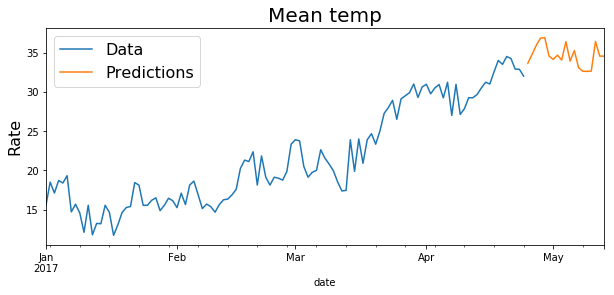

In [46]:
plt.figure(figsize=(10,4))

data.meantemp.plot()
rolling_predictions.plot()

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Mean temp', fontsize=20)
plt.ylabel('Rate', fontsize=16)

In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [48]:
data=pd.read_csv('DailyDelhiClimateTest.csv',index_col=0)
data 

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [49]:
len(data.meantemp)

114

In [50]:
df=data.drop(data[["humidity","wind_speed","meanpressure"]],axis="columns")
df

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [51]:
train = df[:-14]
test= df[-14:]
test

,meantemp
date,
2017-04-11,29.250000
2017-04-12,29.250000
2017-04-13,29.666667
2017-04-14,30.500000
2017-04-15,31.222222
2017-04-16,31.000000
2017-04-17,32.555556
2017-04-18,34.000000
2017-04-19,33.500000


In [52]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
number_of_batches=30 #30 days in 1 batch
number_of_features=1 # we are using only 1 time series it could be more than 1 in case of multiple time seris 
generator = TimeseriesGenerator(scaled_train,scaled_train,length=number_of_batches,batch_size=1)

In [11]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
X.shape

Given the Array: 
[0.20906568 0.31914894 0.26004728 0.32765957 0.3144208  0.35396518
 0.15780142 0.19932811 0.15197568 0.04728132 0.         0.03359462
 0.0951189  0.09361702 0.23126735 0.15531915 0.03073286 0.08687943
 0.15400203 0.18141097 0.18686401 0.31659574 0.3028786  0.31267345
 0.42553191 0.22036474 0.23404255 0.16441006 0.19858156 0.23167849]
Predict this y: 
 [[0.21808511]]


(1, 30, 1)

In [56]:
model = Sequential()
model.add(LSTM(200,activation='relu',input_shape=(number_of_batches,number_of_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [57]:
model.fit(generator,epochs=50)

Epoch 1/50
70/70 [==============================] - 2s 18ms/step - loss: 0.0283
Epoch 2/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0144
Epoch 3/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0185
Epoch 4/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0127
Epoch 5/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0145
Epoch 6/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0132
Epoch 7/50
70/70 [==============================] - 1s 17ms/step - loss: 0.0121
Epoch 8/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0121
Epoch 9/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0108
Epoch 10/50
70/70 [==============================] - 1s 17ms/step - loss: 0.0102
Epoch 11/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0106
Epoch 12/50
70/70 [==============================] - 1s 18ms/step - loss: 0.0108
Epoch 13/50
70/70 [==================

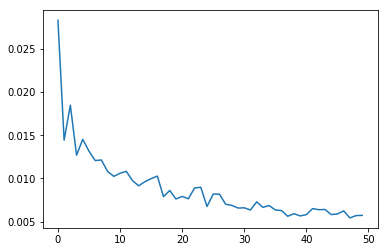

In [58]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [59]:
last_train_batch= scaled_train[-30:]
last_train_batch

array([[0.2712766 ],
       [0.27423168],
       [0.29787234],
       [0.37765957],
       [0.55319149],
       [0.4212766 ],
       [0.58265139],
       [0.58156028],
       [0.5248227 ],
       [0.59574468],
       [0.69148936],
       [0.72340426],
       [0.76241135],
       [0.65957447],
       [0.77021277],
       [0.78723404],
       [0.80378251],
       [0.85106383],
       [0.7781155 ],
       [0.83510638],
       [0.86702128],
       [0.79787234],
       [0.82978723],
       [0.84822695],
       [0.77577741],
       [0.86052009],
       [0.68085106],
       [0.62234043],
       [0.68617021],
       [0.71732523]])

In [60]:
last_train_batch.shape # we have to reshape it like x that is how it is been trained 

(30, 1)

In [61]:
last_train_batch = last_train_batch.reshape((1, number_of_batches,number_of_features))

In [62]:
model.predict(last_train_batch)

array([[0.73275864]], dtype=float32)

In [63]:
scaled_test[0]

array([0.77659574])

In [64]:
test_predictions = []

first_eval_batch = scaled_train[-number_of_batches:]
current_batch = first_eval_batch.reshape((1, number_of_batches, number_of_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#[:,1:,:],[[current_pred]],axis=1 replacing first number with current_pred


In [65]:
test_predictions

[array([0.73275864], dtype=float32),
 array([0.7516639], dtype=float32),
 array([0.77029526], dtype=float32),
 array([0.78956985], dtype=float32),
 array([0.81017685], dtype=float32),
 array([0.8287244], dtype=float32),
 array([0.8492368], dtype=float32),
 array([0.8691087], dtype=float32),
 array([0.888081], dtype=float32),
 array([0.9078789], dtype=float32),
 array([0.9285254], dtype=float32),
 array([0.94904214], dtype=float32),
 array([0.96960086], dtype=float32),
 array([0.9883633], dtype=float32)]

In [66]:
test.head()

,meantemp,Prediction
date,,
2017-04-11,29.250000,26.423737
2017-04-12,29.250000,26.000867
2017-04-13,29.666667,25.660423
2017-04-14,30.500000,25.379534
2017-04-15,31.222222,25.155345


In [67]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Prediction']  = true_predictions

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
test

,meantemp,Prediction
date,,
2017-04-11,29.250000,28.219828
2017-04-12,29.250000,28.664102
2017-04-13,29.666667,29.101939
2017-04-14,30.500000,29.554892
2017-04-15,31.222222,30.039156
2017-04-16,31.000000,30.475023
2017-04-17,32.555556,30.957064
2017-04-18,34.000000,31.424054
2017-04-19,33.500000,31.869904


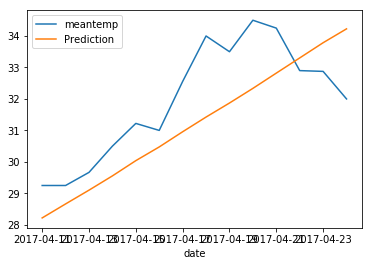

In [69]:
test.plot()

In [3]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'